# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# # Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

# Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
# import tensorflow as tf
# gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.3333)
# sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

Using TensorFlow backend.
c:\users\user\.conda\envs\tf113\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\user\.conda\envs\tf113\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\user\.conda\envs\tf113\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\user\.conda\envs\tf113\lib\site-packages\tensorflo

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""

LEARNING_RATE = 0.01
EPOCHS = 25
BATCH_SIZE = 256
MOMENTUM = 0.1


OPTIMIZER=['sgd',
           'RMSprop',
           'AdaGrad',
           'Adam',]


In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for op in OPTIMIZER:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    
    print("Experiment with OPTIMIZER = ", op)
    
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
#     optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    
    if(op=='sgd'):
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=keras.optimizers.SGD(lr=LEARNING_RATE))
    elif(op=='RMSprop'):
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=keras.optimizers.RMSprop(lr=LEARNING_RATE, decay=0.02))
    elif(op=='AdaGrad'):
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=keras.optimizers.Adagrad(lr=LEARNING_RATE, decay=0.02))
    else:
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=keras.optimizers.Adam(lr=LEARNING_RATE,decay=0.02))

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "op-%s" % str(op)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with OPTIMIZER =  sgd
Instructions for updating:
Colocations handled automatically by placer.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 1,746,

Epoch 11/25
50000/50000 [==============================] - 2s 48us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 12/25
50000/50000 [==============================] - 2s 48us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 13/25
50000/50000 [==============================] - 2s 48us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 14/25
50000/50000 [==============================] - 2s 48us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 15/25
50000/50000 [==============================] - 2s 48us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 16/25
50000/50000 [==============================] - 2s 48us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 17/25
50000/50000 [==============================] - 2s 47us/step - loss: 14.5063 - accuracy: 

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 3s 56us/step - loss: 14.4241 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 2/25
50000/50000 [==============================] - 2s 50us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 3/25
50000/50000 [==============================] - 3s 50us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 4/25
50000/50000 [==============================] - 2s 50us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 5/25
50000/50000 [==============================] - 2s 50us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 6/25
50000/50000 [==============================] - 2s 50us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 7/25
50000/50000 [==============================] 

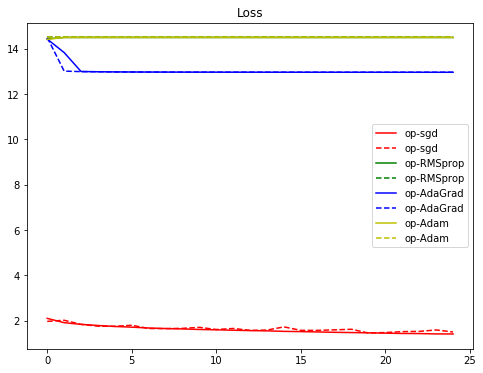

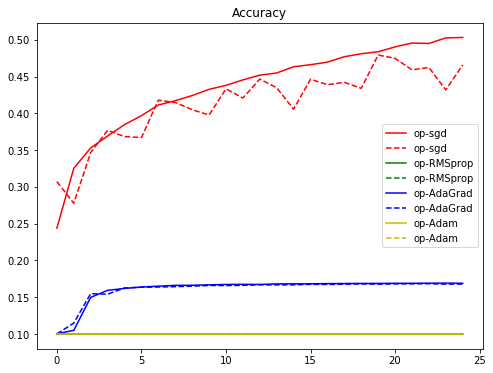

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()